In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the CSV
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = 'date')
#Set the date as the index
#df['date'] = pd.to_datetime(df['date']) #important to do this so that plotting can reduce the amount of x-ticks
#df.set_index('date', inplace = True)
#Remove page views in the top 2.5% and bottom 2.5% of the dataset
mask = ((df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile((1-0.025))))
df = df[mask]

df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [3]:
df.info() #makes sure there are no null values! 1304-1304-GOOD

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


Text(0.5, 1.0, '\nDaily freeCodeCamp Forum Page Views 5/2016 - 12/2019')

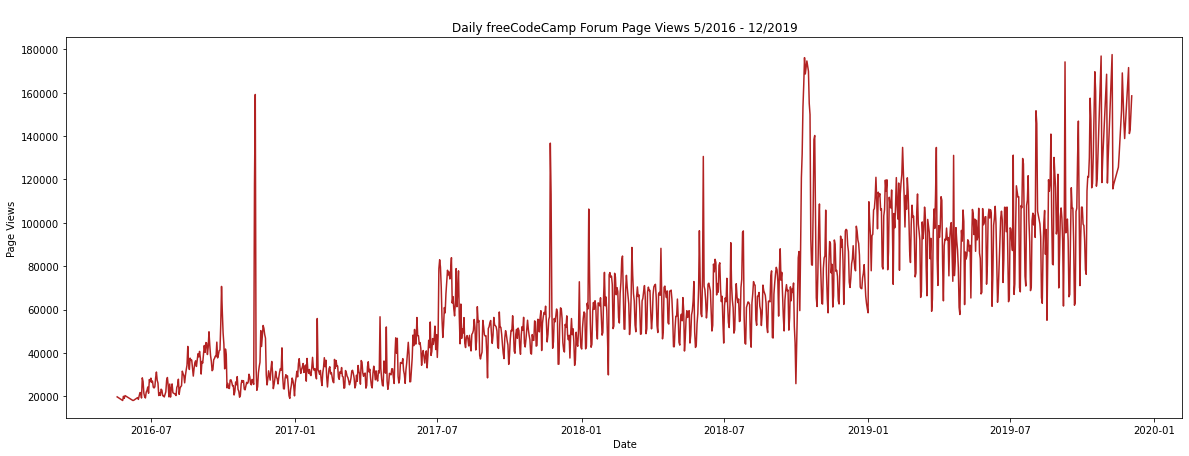

In [4]:
#- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016- 
  #12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
plt.figure(figsize=(20, 7))
#plt.grid()
plt.plot(df.index, df['value'], color = 'firebrick')
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title('\nDaily freeCodeCamp Forum Page Views 5/2016 - 12/2019')

In [5]:
#df_monthly_averages = df.resample('M').mean()
#df_monthly_averages.head()

In [6]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should 
#show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

#df_monthly_averages['month'] = df_monthly_averages.index.month
#df_monthly_averages['year'] = df_monthly_averages.index.year
#df_monthly_averages

df['month'] = df.index.month
df['year'] = df.index.year
df_avgs = df.groupby(['year','month'])['value'].mean()
print(df_avgs.to_frame().head())
df_avgs = df_avgs.unstack() #important here, unravels the data to look like an excel table
df_avgs

                   value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


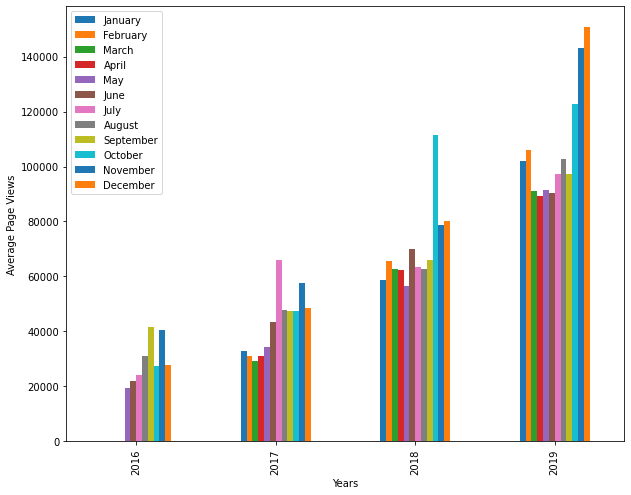

In [7]:
df_avgs.plot.bar(legend=True, figsize=(10,8))
fontsize=10

plt.ylabel('Average Page Views', fontsize=fontsize)
plt.xlabel('Years', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'], fontsize=fontsize)
plt.savefig('bar_plot.png')
#plt.close() - Use this not to show the plot

In [8]:
df.head()
df_monthly_averages = df.resample('M').mean()
df_monthly_averages.head()

,value,month,year
date,,,
2016-05-31,19432.400000,5.0,2016.0
2016-06-30,21875.105263,6.0,2016.0
2016-07-31,24109.678571,7.0,2016.0
2016-08-31,31049.193548,8.0,2016.0
2016-09-30,41476.866667,9.0,2016.0


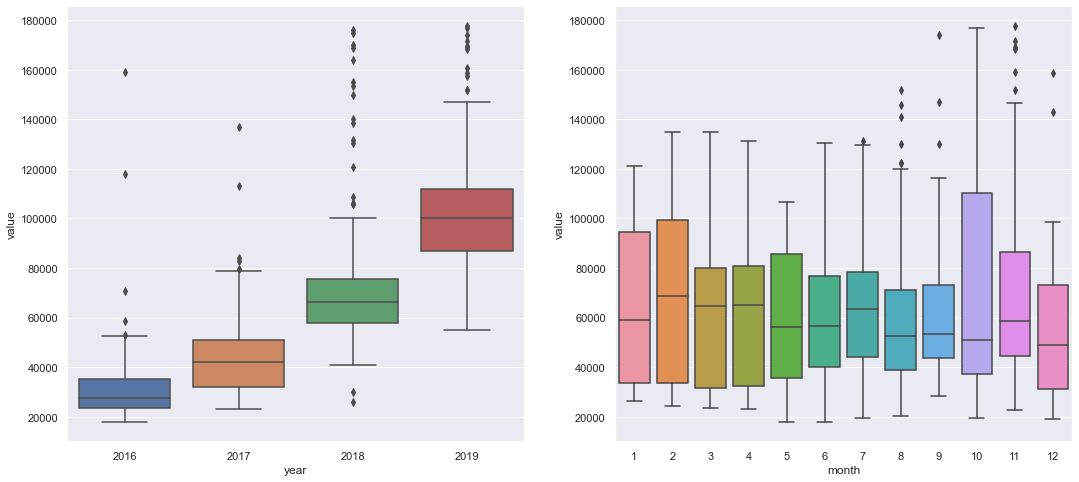

In [10]:
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='month', y='value', data=df)
sns.set(rc = {'figure.figsize':(18,8)})